In [26]:
# Import required libraries
import pandas as pd # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt # Visualizations
%matplotlib inline

In [68]:
# upload to colab
from google.colab import files
uploaded = files.upload()

Saving economic_index.csv to economic_index.csv


In [69]:
# load the dataset: height-weight.csv
df = pd.read_csv('economic_index.csv')

In [70]:
# display first 5 rows
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [71]:
# drop unnecessary columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [72]:
# check null values
df.isnull().sum()

,0
year,0
month,0
interest_rate,0
unemployment_rate,0
index_price,0


In [74]:
# we are interested in interest_rate, unemployemnt_rate and index_price
df_new = df[['interest_rate','unemployment_rate','index_price']]

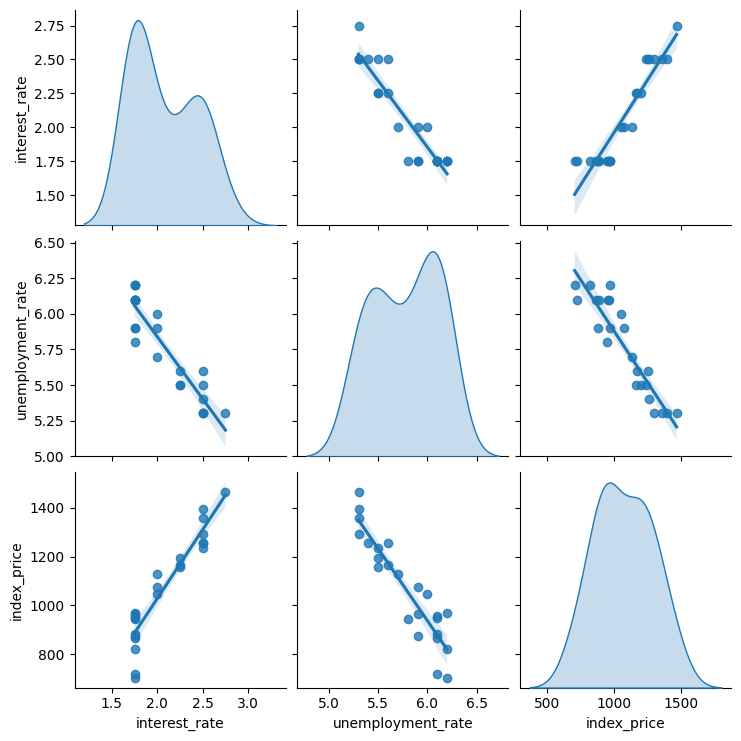

In [75]:
# To see clarity about the distribution of the data, pair plot can be used
import seaborn as sns
sns.pairplot(df_new, diag_kind='kde',kind ='reg')

In [77]:
# Finding correlation
df_new.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

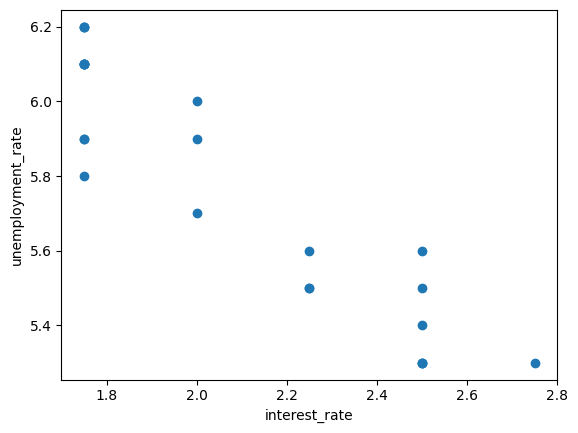

In [78]:
# Visualizing more closely with the scatter plot
plt.scatter(df_new['interest_rate'],df_new['unemployment_rate'])
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')


<Axes: >

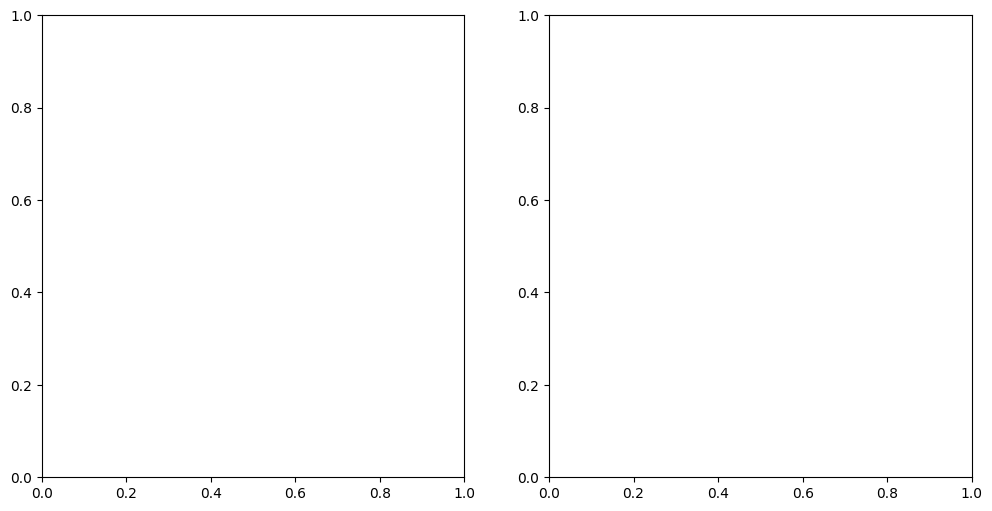

In [88]:
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_new['index_price'], df_new['unemployment_rate'])
plt.xlabel('index_price')
plt.ylabel('unemployment_rate')
plt.title('index_price vs. Unemployment Rate')
plt.subplot(1, 2, 2)
plt.scatter(df_new['index_price'], df_new['interest_rate'])
plt.xlabel('index_price')
plt.ylabel('unemployment_rate')
plt.title('index_price vs. Unemployment Rate')


Text(0.5, 1.0, 'index_price vs. Interest Rate')

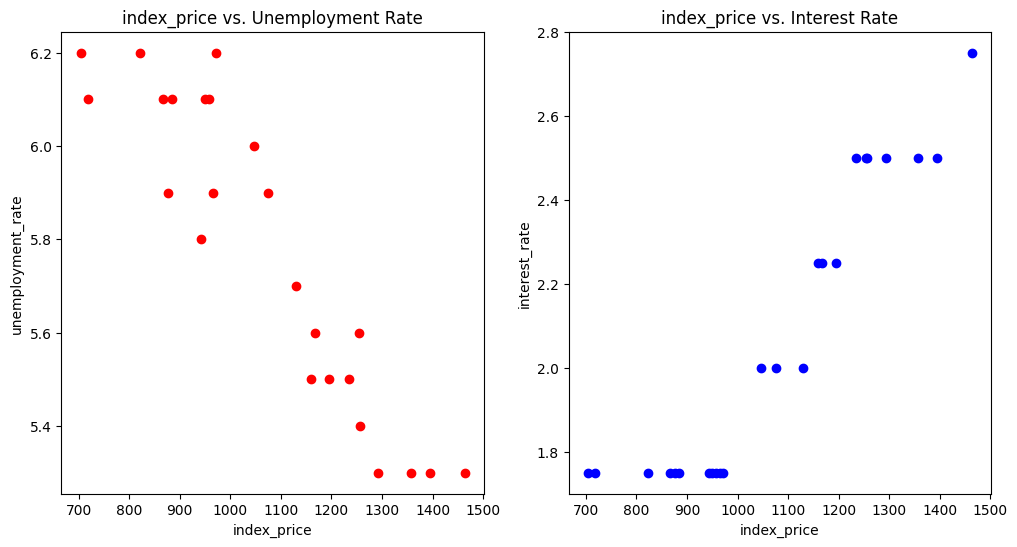

In [90]:
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_new['index_price'], df_new['unemployment_rate'], c='red')
plt.xlabel('index_price')
plt.ylabel('unemployment_rate')
plt.title('index_price vs. Unemployment Rate')
plt.subplot(1, 2, 2)
plt.scatter(df_new['index_price'], df_new['interest_rate'], c='blue')
plt.xlabel('index_price')
plt.ylabel('interest_rate')
plt.title('index_price vs. Interest Rate')


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

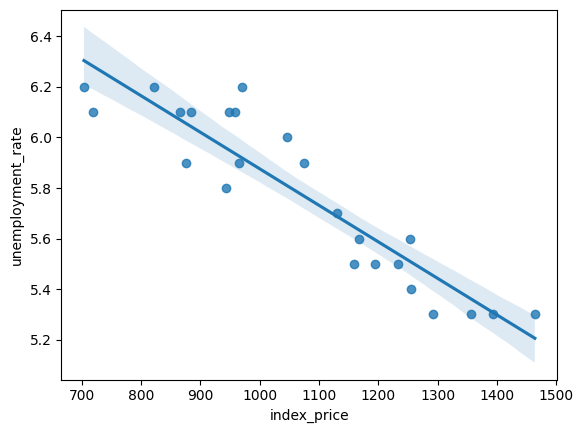

In [92]:
sns.regplot(x='index_price',y='unemployment_rate',data=df_new)

<Axes: xlabel='index_price', ylabel='interest_rate'>

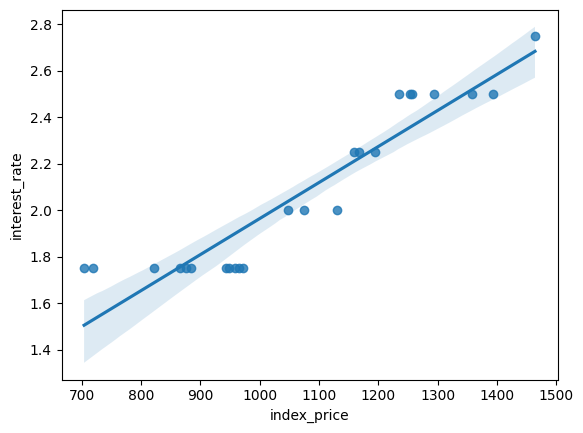

In [93]:
sns.regplot(x='index_price',y='interest_rate',data=df_new)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

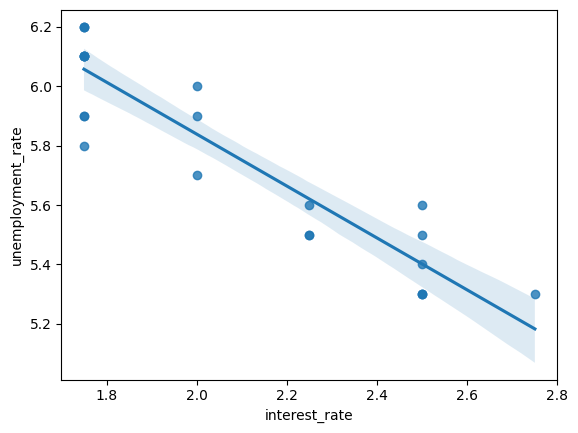

In [94]:
sns.regplot(x='interest_rate',y='unemployment_rate',data=df_new)

In [95]:
df_new.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

In [80]:
# independent variable (X) and dependent variable(y)
X= df_new.iloc[:,:-1] # all rows, all columns except last
y= df_new.iloc[:,-1]  #last column

In [81]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [82]:
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [84]:
# Split the data into training(75%) and testing(25%) sets ( taking 3:1 ratio here)

# train_test_split() is used to divide the datasets into 2 sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)   #random_state ensure same split every time


In [97]:
from sklearn.preprocessing import StandardScaler

# create StandardScaler object
sc = StandardScaler()
# Apply scaling to training data making mean=0, and variance =1
X_train = sc.fit_transform(X_train)

# Apply the same scaling to the test set, IMP: here we use transform() and not fit_transform()
# As fit computes statistics from train data, and transforms apply those parameters to scale data
# we do not apply fit to test to avoid data leakage from test data, as if we fit again, it recalculates the statistics on test data
X_test = sc.transform(X_test)


In [98]:
X_train

array([[ 1.01512945, -1.29106704],
       [ 1.01512945, -1.29106704],
       [ 1.01512945, -1.29106704],
       [-1.09321633,  0.21797236],
       [-1.09321633,  1.42520387],
       [ 1.71791138, -1.29106704],
       [-0.3904344 ,  0.82158811],
       [ 1.01512945, -0.3856434 ],
       [-1.09321633,  1.42520387],
       [ 1.01512945, -0.98925916],
       [ 0.31234752, -0.68745128],
       [-1.09321633,  0.51978024],
       [ 0.31234752, -0.3856434 ],
       [-1.09321633,  1.12339599],
       [-1.09321633,  1.12339599],
       [ 1.01512945, -0.68745128],
       [-1.09321633,  1.12339599],
       [-0.3904344 ,  0.51978024]])

In [99]:
# IMport LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

# create LinearRegression model instance
lin_reg_model = LinearRegression() #if using for large datasets, use n_jobs=-1 as parameter, so as to allow all available CPU cores for faster computation



In [100]:
# Train the model with the training data, fit finds the optimal coefficient for the linear equation
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [101]:
# cross validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 3 folds
cv_scores = cross_val_score(lin_reg_model, X_train, y_train, scoring='neg_mean_squared_error',cv=3)


In [102]:
np.mean(cv_scores)

np.float64(-9050.63366121025)

In [104]:
## prediction
y_pred = lin_reg_model.predict(X_test)
y_pred

array([ 883.25722414, 1063.74361263,  860.07391498,  883.25722414,
       1197.8633828 ,  929.62384246])

### Evaluating Model Performance
#### Metrics used
##### 1. RMSE
##### 2. R square

In [105]:
# Import metrics to evaluate our model's performance
# These help us quantify how well our predictions match the actual values
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [106]:
# Performance Metrics
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1503.6018020432377
29.802921268920386
38.77630464656525


In [107]:
# R2 score metrics
from sklearn.metrics import r2_score

# calculate score
score = r2_score(y_test,y_pred)
print(score)

0.9277165680399804


In [57]:
X_test.shape

(6, 1)

In [108]:
# Calculate using r2
adj_r2_score = 1 - ((1- score)*(len(y_test) -1))/((len(y_test))-(X_test.shape[1])-1)
adj_r2_score

0.8795276133999673

In [109]:
lin_reg_model.coef_

array([124.86540744, -76.81479118])

In [110]:
lin_reg_model.intercept_

np.float64(1106.0555555555557)

## Assumptions

Text(0, 0.5, 'y_pred')

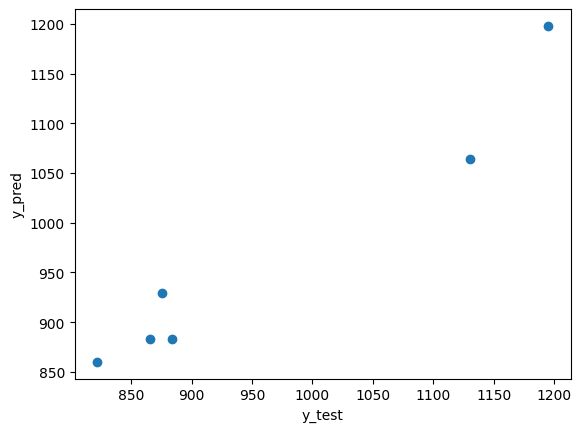

In [111]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [112]:
residual = y_test - y_pred
residual

,index_price
19,-17.257224
10,66.256387
21,-38.073915
18,0.742776
7,-2.863383
20,-53.623842


/tmp/ipython-input-1179500101.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='index_price', ylabel='Density'>

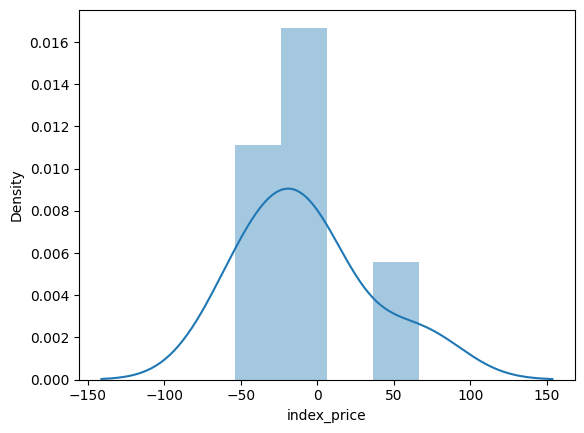

In [113]:
# plot the residuals
sns.distplot(residual)

Text(0, 0.5, 'residual')

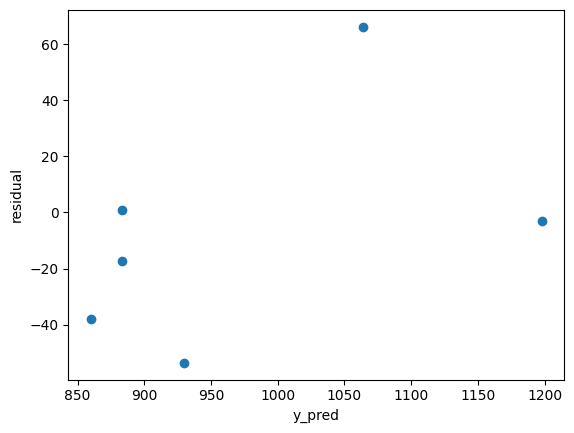

In [115]:
# scatter plot wrt predictions and residuals
plt.scatter(y_pred,residual)
plt.xlabel('y_pred')
plt.ylabel('residual')

In [116]:
# OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [117]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):             -0.090
Method:                 Least Squares   F-statistic:                             0.2559
Date:                Wed, 01 Oct 2025   Prob (F-statistic):                       0.777
Time:                        02:55:19   Log-Likelihood:                         -151.73
No. Observations:                  18   AIC:                                      307.5
Df Residuals:                      16   BIC:                                      309.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           124.8654    745.209      0.168      0.869   -1454.907    1704.638
x2           -76.8148    745.209     -0.103      0.919   -1656.587    1502.957
==============================================================================
Omnibus:                        3.446   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                2.089
Skew:                          -0.833   Prob(JB):                        0.352
Kurtosis:                       3.085   Cond. No.                         5.19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
lin_reg_model.coef_

array([124.86540744, -76.81479118])

In [119]:
lin_reg_model.intercept_

np.float64(1106.0555555555557)

## When to Use Multiple Linear Regression:

### Used when you want to see how several factors together affect one outcome.

**Example:**  
Exam score might depend on:  
- Hours studied  
- Hours slept  
- Number of classes attended  

There’s **one main result** you’re interested in (the dependent variable).  
- Examples: exam score, house price, weight, sales revenue  

There are **two or more possible influences** (independent variables).  
- Example: house price depends on size, location, and age of the house  

The relationship is expected to be **roughly linear for each factor**.  
- Meaning, if you keep all other factors steady, changing one will still have a linear effect.  

---

✅ **Good examples where it makes sense:**  
- Predicting salary from years of experience, education level, and skills  
- Predicting blood pressure from age, weight, and exercise level  
- Predicting sales from advertising spend, price of product, and season  

❌ **Not good to use if:**  
- The relationships are very curved or nonlinear  
- The factors affect each other in complicated ways  
- You don’t have enough data compared to the number of factors  
